In [130]:
import pandas as pd
import numpy as np
from matplotlib import sankey
import os
import matplotlib.pyplot as plt
%load_ext rbql
pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 50)

The rbql extension is already loaded. To reload it, use:
  %reload_ext rbql


In [3]:
file_trt_dict = '/home/jiageng/Documents/fhr/data/CoMMpass_IA22_FlatFile_Dictionaries/MMRF_CoMMpass_IA22_STAND_ALONE_TRTRESP.tsv'

In [131]:
pd.read_csv(file_trt_dict, sep='\t', encoding='utf-8')

,column,name,label
0,1,PUBLIC_ID,Public ID
1,2,line,Line of therapy
2,3,trtname,Treatment name
3,4,trtshnm,Treatment (short name)
4,5,catname,NaN
5,6,trtstdy,Treatment start date
6,7,trtendy,Treatment end date
7,8,trtgroup,Treatment group
8,9,thername,Therapy name
9,10,thershnm,Therapy classification (short name)


In [5]:
file_trt = '/home/jiageng/Documents/fhr/data/CoMMpass_IA22_FlatFiles/MMRF_CoMMpass_IA22_STAND_ALONE_TRTRESP.tsv'

In [ ]:
df_trt = pd.read_csv(file_trt, encoding='cp1252', sep='\t')
df_trt = df_trt.assign(trtlen = lambda x: x.trtendy - x.trtstdy, drugs = lambda x: x.trtname.str.split('/'))
df_trt

,PUBLIC_ID,line,trtname,trtshnm,catname,trtstdy,trtendy,trtgroup,thername,thershnm,...,trtfresp,ttbrespcyc,ttbrespdy,ttrespcyc,ttrespdy,therftrt,nagents,enr,trtlen,drugs
0,MMRF_1014,1,Bortezomib/Dexamethasone,Bor-Dex,Proteasome/Steroid,1,65,1,Bortezomib/Dexamethasone,Bor-Dex,...,0,28.0,781.0,28.0,781.0,1.0,2.0,1,64,"[Bortezomib, Dexamethasone]"
1,MMRF_1014,1,Bortezomib/Lenalidomide/Dexamethasone,Bor-Len-Dex,Proteasome/IMID/Steroid,66,106,2,Bortezomib/Dexamethasone + Bortezomib/Lenalido...,Bor-Dex + Bor-Len-Dex,...,0,28.0,781.0,28.0,781.0,NaN,NaN,1,40,"[Bortezomib, Lenalidomide, Dexamethasone]"
2,MMRF_1014,1,Bortezomib/Dexamethasone,Bor-Dex,Proteasome/Steroid,107,185,3,Bortezomib/Dexamethasone + Bortezomib/Lenalido...,Bor-Dex + Bor-Len-Dex + Bor-Dex,...,0,28.0,781.0,28.0,781.0,NaN,NaN,1,78,"[Bortezomib, Dexamethasone]"
3,MMRF_1014,1,Bortezomib/Thalidomide/Dexamethasone,Bor-Thal-Dex,Proteasome/IMID/Steroid,186,365,4,Bortezomib/Dexamethasone + Bortezomib/Lenalido...,Bor-Dex + Bor-Len-Dex + Bor-Dex + Bor-Thal-Dex,...,0,28.0,781.0,28.0,781.0,NaN,NaN,1,179,"[Bortezomib, Thalidomide, Dexamethasone]"
4,MMRF_1014,1,Bortezomib/Dexamethasone,Bor-Dex,Proteasome/Steroid,366,380,5,Bortezomib/Dexamethasone + Bortezomib/Lenalido...,Bor-Dex + Bor-Len-Dex + Bor-Dex + Bor-Thal-Dex...,...,0,28.0,781.0,28.0,781.0,NaN,NaN,1,14,"[Bortezomib, Dexamethasone]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031,MMRF_2848,1,Carfilzomib/Lenalidomide/Dexamethasone,Car-Len-Dex,Proteasome/IMID/Steroid,1,153,1,Carfilzomib/Lenalidomide/Dexamethasone,Car-Len-Dex,...,1,4.0,92.0,2.0,29.0,1.0,3.0,1,152,"[Carfilzomib, Lenalidomide, Dexamethasone]"
4032,MMRF_2848,1,Carfilzomib/Lenalidomide/Cyclophosphamide/Dexa...,Car-Len-Cyc-Dex,Proteasome/IMID/Chemotherapy/Steroid,154,154,2,Carfilzomib/Lenalidomide/Dexamethasone + Carfi...,Car-Len-Dex + Car-Len-Cyc-Dex,...,0,4.0,92.0,2.0,29.0,NaN,NaN,1,0,"[Carfilzomib, Lenalidomide, Cyclophosphamide, ..."
4033,MMRF_2851,1,Carfilzomib/Cyclophosphamide/Dexamethasone,Car-Cyc-Dex,Proteasome/Chemotherapy/Steroid,1,122,1,Carfilzomib/Cyclophosphamide/Dexamethasone,Car-Cyc-Dex,...,1,4.0,86.0,4.0,86.0,1.0,3.0,1,121,"[Carfilzomib, Cyclophosphamide, Dexamethasone]"
4034,MMRF_2853,1,Carfilzomib/Lenalidomide/Dexamethasone,Car-Len-Dex,Proteasome/IMID/Steroid,1,128,1,Carfilzomib/Lenalidomide/Dexamethasone,Car-Len-Dex,...,1,3.0,57.0,2.0,29.0,1.0,3.0,1,127,"[Carfilzomib, Lenalidomide, Dexamethasone]"


In [7]:
df_trt.query('PUBLIC_ID=="MMRF_1157"').trtname

678            Bortezomib/Cyclophosphamide/Dexamethasone
679    Bortezomib/Lenalidomide/Cyclophosphamide/Dexam...
680            Bortezomib/Cyclophosphamide/Dexamethasone
681    Bortezomib/Cyclophosphamide/Melphalan/Dexameth...
682            Bortezomib/Cyclophosphamide/Dexamethasone
                             ...                        
697    Carfilzomib/Daratumumab/Lenalidomide/JNJ-64407...
698    Carfilzomib/Daratumumab/Ixazomib/Lenalidomide/...
699    Carfilzomib/Daratumumab/Ixazomib/JNJ-64407564/...
700    Bortezomib/Carfilzomib/Daratumumab/Ixazomib/JN...
701    Bortezomib/Carfilzomib/Daratumumab/JNJ-6440756...
Name: trtname, Length: 24, dtype: object

In [8]:
df_drugs = df_trt\
.explode('drugs')\
.groupby('drugs')\
.agg({'trtdurdy': ['mean', 'std',],
      'fresp': ['count'],
      'bestresp': ['count'],
      'PUBLIC_ID': ['count']
      })
df_drugs

trtdurdy             fresp bestresp PUBLIC_ID
                     mean         std count    count     count
drugs                                                         
AO-176           1.000000         NaN     0        0         1
Acalabrutinib   94.333333   32.129944     0        3         3
Alemtuzumab     10.000000         NaN     1        1         1
Anti-BCMA       78.000000         NaN     0        1         1
Anti-GPRC5D    240.000000         NaN     0        0         1
...                   ...         ...   ...      ...       ...
Trametinib     246.000000  295.715704     8       10        10
Venetoclax     288.275862  413.247409    18       20        29
Vincristine     63.375000   57.423085     4        5         8
Vorinostat      60.000000         NaN     0        1         1
anti-TIGIT      56.000000   41.012193     0        0         2

[76 rows x 5 columns]

In [125]:
df_trt.thercat.unique()

array(['Proteasome/Steroid', 'Proteasome/Steroid/IMID',
       'Proteasome/Steroid/IMID/Chemotherapy', 'IMID/Steroid',
       'IMID/Chemotherapy/Steroid',
       'IMID/Chemotherapy/Steroid/Proteasome', 'IMID',
       'Proteasome/IMID/Steroid', 'IMID/Steroid/Proteasome',
       'Chemotherapy/Steroid', 'BTK/Checkpoint Inhibitor',
       'CD38/IMID/Steroid', 'CD38', 'Proteasome', 'CD74',
       'IMID/Proteasome/Steroid', 'Proteasome/IMID',
       'SLAMF7/IMID/Steroid', 'Proteasome/Chemotherapy',
       'Proteasome/Chemotherapy/Steroid',
       'Proteasome/Chemotherapy/Steroid/IMID', 'SLAMF7/IMID',
       'SLAMF7/IMID/Chemotherapy/Steroid',
       'SLAMF7/IMID/Chemotherapy/Steroid/Proteasome/CD38',
       'Proteasome/IMID/Steroid/Chemotherapy', 'CD38/IMID',
       'CD38/IMID/Proteasome', 'Proteasome/CD38/Steroid',
       'Proteasome/CD38/IMID/Steroid',
       'IMID/Steroid/Proteasome/Chemotherapy',
       'Proteasome/IMID/Chemotherapy/Steroid', 'Proteasome/HDAC/Steroid',
       'Proteasome

Patients who are resistant to first line of therapy: 57

In [132]:
%rbql SELECT a.PUBLIC_ID, a.trtstdy, a.trtendy,a.brespdy,a.pddy,a.ttbrespdy,a.bestrespsh FROM df_trt WHERE a.bestrespsh in ["SD","PD"] and a.trtstdy==1 ORDER BY a.brespdy

,PUBLIC_ID,trtstdy,trtendy,brespdy,pddy,ttbrespdy,bestrespsh
0,MMRF_2681,1,121,28.0,NaN,28.0,SD
1,MMRF_2643,1,117,29.0,NaN,29.0,SD
2,MMRF_2828,1,144,36.0,NaN,36.0,SD
3,MMRF_1916,1,370,41.0,1252.0,41.0,SD
4,MMRF_2085,1,9,43.0,NaN,43.0,SD
...,...,...,...,...,...,...,...
52,MMRF_1388,1,383,212.0,1429.0,212.0,SD
53,MMRF_2216,1,385,231.0,265.0,231.0,SD
54,MMRF_1213,1,33,245.0,441.0,245.0,SD
55,MMRF_1882,1,29,364.0,1052.0,364.0,SD


Patients who relapse within 18 months: 173

In [117]:
%rbql SELECT DISTINCT a.PUBLIC_ID FROM df_trt WHERE a.pddy < 18*30

,PUBLIC_ID
0,MMRF_1024
1,MMRF_1033
2,MMRF_1082
3,MMRF_1229
4,MMRF_1401
...,...
168,MMRF_2801
169,MMRF_2833
170,MMRF_2838
171,MMRF_2843


Patients who relapse within 12 months of ASCT: 43

In [120]:
pd.set_option("display.max_rows", 10)
%rbql SELECT DISTINCT a.PUBLIC_ID FROM df_trt WHERE a.pddy > a.bmtx_day and a.pddy - a.bmtx_day < 12*30 and a.bmtx_rec==1 and a.bmtx_type=='Stem cell, Autologous'

,PUBLIC_ID
0,MMRF_1082
1,MMRF_1137
2,MMRF_1410
3,MMRF_1670
4,MMRF_1838
...,...
38,MMRF_2015
39,MMRF_2200
40,MMRF_2606
41,MMRF_2401


Patients who relapse within 18 months OR relapse within 12 months of ASCT: 186

In [121]:
%rbql SELECT DISTINCT a.PUBLIC_ID FROM df_trt WHERE a.pddy < 18*30 or (a.pddy > a.bmtx_day and a.pddy - a.bmtx_day < 12*30 and a.bmtx_rec==1 and a.bmtx_type=='Stem cell, Autologous')

,PUBLIC_ID
0,MMRF_1024
1,MMRF_1033
2,MMRF_1082
3,MMRF_1137
4,MMRF_1229
...,...
181,MMRF_2801
182,MMRF_2833
183,MMRF_2838
184,MMRF_2843


People who are resistant to initial therapy OR relapse within 18 months OR relapse within 12 months of ASCT: 214

In [140]:
names_clinhr = %rbql SELECT DISTINCT a.PUBLIC_ID FROM df_trt WHERE (a.bestrespsh in ["SD","PD"] and a.trtstdy==1) or (a.pddy < 18*30) or (a.pddy > a.bmtx_day and a.pddy - a.bmtx_day < 12*30 and a.bmtx_rec==1 and a.bmtx_type=='Stem cell, Autologous')
names_clinhr = names_clinhr.PUBLIC_ID.values.tolist()

In [141]:
len(names_clinhr)

214

In [69]:
# RBQL on trt tsv
# SELECT a1, a22, a21 WHERE a22 == "2" or (like(a21, "%DEATH%") or like(a21, "%DECEASED%") or like(a21, "%DIED%") or like(a21, "%EXIT%")) and not like(a21, "%NON RELATED CAUSES%")
vc_trtrsn = df_trt[['trtrsn', 'MMTX_REASONFORTREA']].fillna('NA').value_counts()

for i,o in zip(vc_trtrsn.index, vc_trtrsn):
    print(i, o)

(4.0, 'Completed regimen') 1243
('NA', 'NA') 1055
(3.0, 'Disease progression/Relapse') 678
(2.0, 'Adverse Event or co-morbidity') 351
(5.0, 'Investigator decision for other reasons') 194
(1.0, 'Lack of response') 111
('NA', 'DEATH') 71
(6.0, 'Patient decision') 69
('NA', 'TRANSPLANT') 12
('NA', 'MOVED TO SCT') 9
('NA', 'MOVE TO TRANSPLANT') 7
('NA', 'PATIENT DECEASED') 6
('NA', 'PATIENT DIED') 6
('NA', 'PROCEED TO TRANSPLANT') 5
('NA', 'MOVED TO AUTO SCT') 4
('NA', 'STEM CELL MOBILIZATION AND COLLECTION') 4
('NA', 'EXITUS') 4
('NA', 'PATIENT DEATH') 4
('NA', 'PROTOCOL PROCEDURES') 4
('NA', 'DOCTOR DECISION') 3
('NA', 'DOSE CHANGE') 3
('NA', 'PATIENT EXPIRED') 3
('NA', 'TX WAS HELD BECAUSE PT GOING FOR ASCTX ON 4/7/15') 2
('NA', 'WENT TO TRANSPLANT') 2
('NA', 'UNKNOWN') 2
('NA', 'PATIENT WENT ON HOSPICE') 2
('NA', 'PATIENT WENT TO TRANSPLANT') 2
('NA', 'PT DEATH') 2
('NA', 'DOSE OF CARFILZOMIB INCREASED AT BEGINNING OF NEXT CYCLE') 2
('NA', 'SUBJECT IS DECEASED.') 2
('NA', 'SUBJECT IS D

In [28]:
df_trt.query('PUBLIC_ID=="MMRF_1049"').explode('drugs')[['drugs','MMTX_REASONFORTREA','trtfresp','bestresp','response']]

,drugs,MMTX_REASONFORTREA,trtfresp,bestresp,response
619,Bortezomib,Completed regimen,1,Partial Response,1
619,Cyclophosphamide,Completed regimen,1,Partial Response,1
619,Dexamethasone,Completed regimen,1,Partial Response,1
620,Bortezomib,Completed regimen,1,Very Good Partial Response,1
620,Dexamethasone,Completed regimen,1,Very Good Partial Response,1
...,...,...,...,...,...
634,METRO28,Disease progression/Relapse,0,NaN,0
634,Venetoclax,Disease progression/Relapse,0,NaN,0
634,Dexamethasone,Disease progression/Relapse,0,NaN,0
635,Daratumumab,DEATH,0,NaN,0


In [27]:
df_trt.explode('drugs')[['drugs','trtfresp','response']].groupby('drugs')[['trtfresp','response']].agg(['sum','count']).assign(trtfresp_ratio = lambda x: x.trtfresp['sum']/x.trtfresp['count'], response_ratio = lambda x: x.response['sum']/x.response['count']).sort_values(('response', 'count'), ascending=False).head(10)

trtfresp       response       trtfresp_ratio response_ratio
                      sum count      sum count                              
drugs                                                                       
Dexamethasone        1281  2919     2311  2919       0.438849       0.791709
Lenalidomide          782  2023     1793  2023       0.386555       0.886307
Bortezomib            771  1702     1438  1702       0.452996       0.844888
Cyclophosphamide      333   907      729   907       0.367144       0.803749
Carfilzomib           345   887      689   887       0.388952       0.776776
Pomalidomide          121   396      214   396       0.305556       0.540404
Daratumumab           126   347      194   347       0.363112       0.559078
Melphalan              52   242      206   242       0.214876       0.851240
Ixazomib               34   137      100   137       0.248175       0.729927
Prednisone             54   136      103   136       0.397059       0.757353

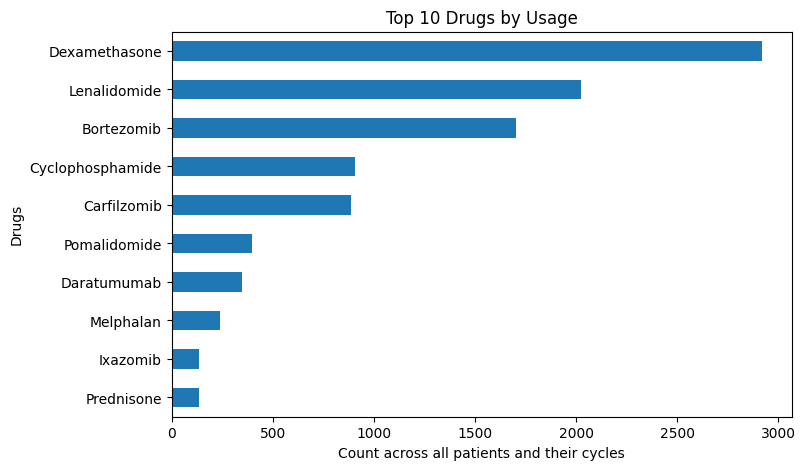

In [130]:
# Sort the dataframe by the count column in descending order
Ntail=10
df_drugs_sorted = df_drugs.sort_values(('PUBLIC_ID', 'count'), ascending=True).tail(Ntail)

# Plot the horizontal barplot
df_drugs_sorted[('PUBLIC_ID', 'count')].plot(kind='barh')
plt.xlabel('Count across all patients and their cycles')
plt.gcf().set_size_inches(8, 5)
plt.ylabel('Drugs')
plt.title(f'Top {Ntail} Drugs by Usage')
plt.show()

In [78]:
df_trt.loc[df_trt.trtgroup == 10,'PUBLIC_ID']

9      MMRF_1014
635    MMRF_1049
700    MMRF_1157
Name: PUBLIC_ID, dtype: object

In [ ]:
# 